                   Assignment No 7 - Clustering (Question 2: Airlines Data)
    
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers


                               HIERARCHICAL CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.shape

(3999, 12)

                                EDA

In [5]:
data.info()  #No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
#drop the column
data =data.drop(['ID#'], axis = 1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
data[data.duplicated()] 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
data = data.drop_duplicates()
data.shape

(3998, 11)

In [10]:
data[data.duplicated()] 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [11]:
data1 = data.copy()

In [12]:

#Normalize Data
norm = MinMaxScaler()
newdf = norm.fit_transform(data1.to_numpy())
norm_df = pd.DataFrame(newdf, columns=data1.columns)
norm_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


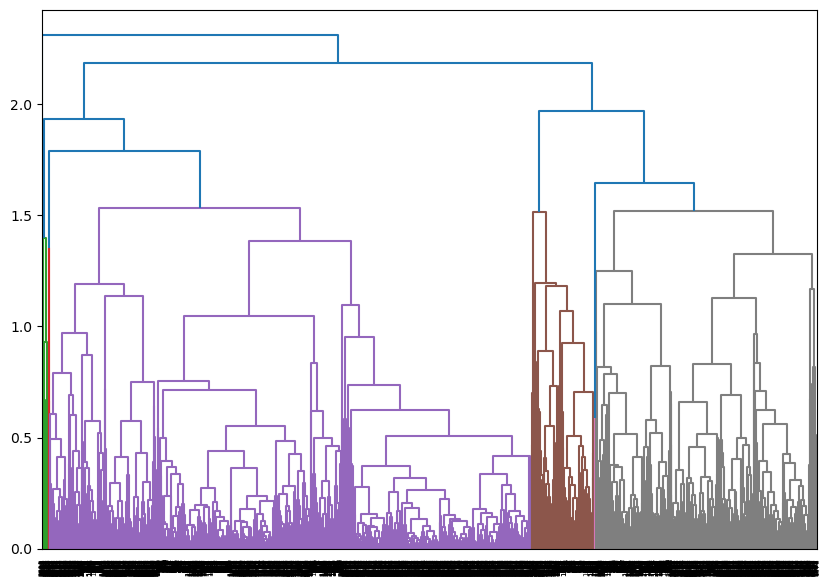

In [14]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(norm_df,'complete'))
plt.show()

In [15]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=6)

In [16]:
yhc = hclusters.fit_predict(norm_df)
yhc

array([1, 1, 1, ..., 5, 4, 4], dtype=int64)

In [17]:
data1['Clusters'] = yhc

In [18]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [19]:
data1['Clusters'].value_counts()

1    887
4    822
0    808
2    582
3    535
5    364
Name: Clusters, dtype: int64

In [20]:
data1.groupby('Clusters').agg(['mean']).reset_index()


,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
1,1,45251.373168,23.779030,1.000000,1.038331,1.001127,2697.231116,5.838782,179.461105,0.551297,5230.268320,0.0
2,2,87189.902062,375.512027,1.053265,1.039519,1.000000,7646.649485,9.438144,1070.049828,3.321306,4442.544674,1.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,29964.128954,84.173966,1.000000,1.000000,1.000000,2411.928224,5.621655,304.190998,0.855231,1764.986618,0.0
5,5,68109.631868,140.532967,2.733516,1.000000,1.000000,19167.903846,16.442308,321.280220,0.848901,4259.656593,1.0


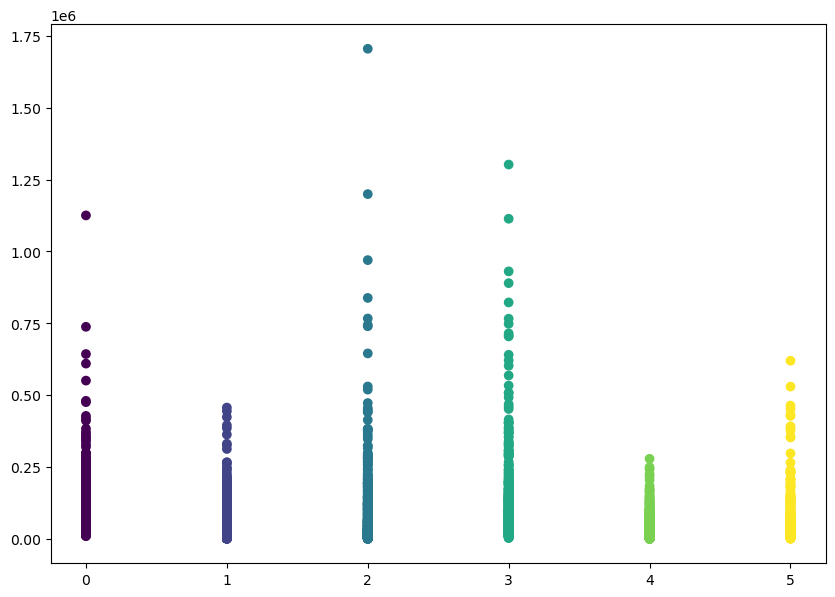

In [21]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data1['Clusters'],data1['Balance'], c=hclusters.labels_) 
plt.show()


In [23]:
data2 = data.copy()

In [24]:
#Its Quite difficult to select cluster numbers from dendrograms. so lets use silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(norm_df)
        silhouette_score2 = silhouette_score(norm_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

In [25]:
#silhouette_score is significatly large when use cluster_number =4 & linkage = Average
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
yhc = hclusters.fit_predict(norm_df)
data2['Clusters'] = yhc
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [26]:
data2['Clusters'].value_counts()

1    2517
0    1476
3       4
2       1
Name: Clusters, dtype: int64

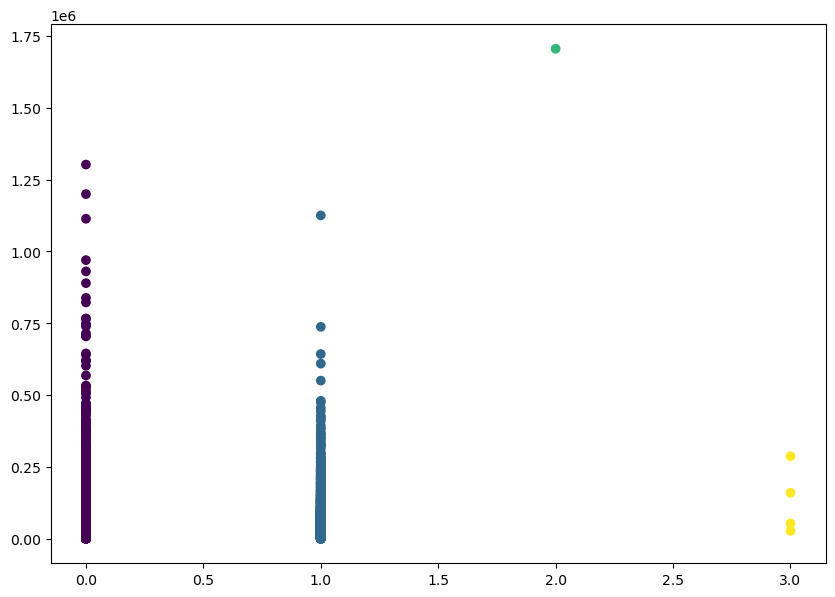

In [27]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data2['Clusters'],data2['Balance'], c=yhc) 
plt.show()

                   K-Means Clustering

In [28]:
norm_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


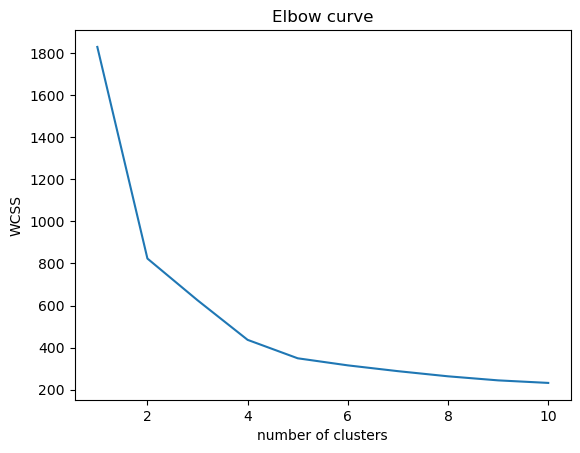

In [29]:
from sklearn.cluster import KMeans 
# Elbow curve
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(norm_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# selecting 5 clusters from above  plot
model=KMeans(n_clusters=5)
model.fit(norm_df)
model.labels_

array([4, 4, 4, ..., 1, 0, 0])

In [31]:
data3 = data.copy()

In [32]:
x=pd.Series(model.labels_)
data3['Clusters']=x

In [33]:
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,4.0
1,19244,0,1,1,1,215,2,0,0,6968,0,4.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,4.0
3,14776,0,1,1,1,500,1,0,0,6952,0,4.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3.0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1.0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0.0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0.0


In [34]:
data3['Clusters'].value_counts()

0.0    1031
4.0     868
1.0     807
3.0     673
2.0     618
Name: Clusters, dtype: int64

                                    DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df = df.drop('ID#',axis = 1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.shape

(3999, 11)

In [5]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [6]:
df = df.drop_duplicates()
df.shape

(3998, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


<AxesSubplot:>

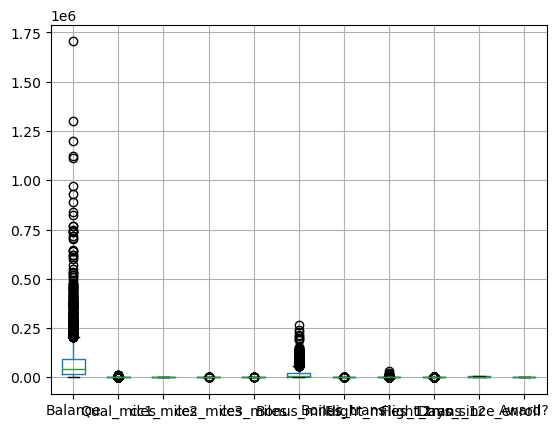

In [8]:
df.boxplot()  #Too many outliers

C:\Users\Gujar\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Gujar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Gujar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Gujar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Gujar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


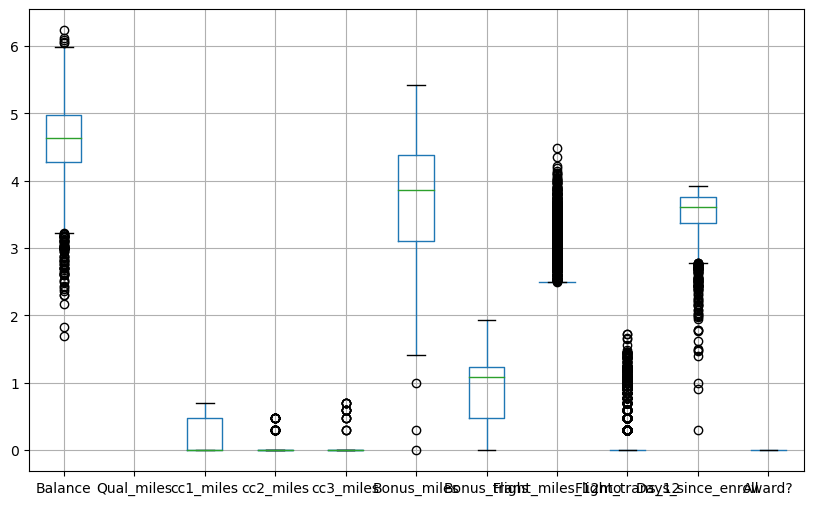

In [9]:
plt.figure(figsize =(10,6))
df.apply(np.log10).boxplot()
plt.show()

In [11]:
array =df.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [12]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)  #standardization
X

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [28]:
from sklearn.metrics import silhouette_score

eps_values = [2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
min_samples_values = [1,2,3,4,5,6,7,8,9,10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_df = DBSCAN(eps=eps,min_samples=min_samples)
        dbscan_df.fit(X)
        labels = dbscan_df.labels_
        print("For eps :",eps,"and min_sample:",min_samples," Sil_score is:",silhouette_score(X, labels))
    continue

For eps : 2 and min_sample: 1  Sil_score is: 0.20865310773333376
For eps : 2 and min_sample: 2  Sil_score is: 0.2364410679722615
For eps : 2 and min_sample: 3  Sil_score is: 0.24564994298875753
For eps : 2 and min_sample: 4  Sil_score is: 0.2523754796460787
For eps : 2 and min_sample: 5  Sil_score is: 0.2536824824850249
For eps : 2 and min_sample: 6  Sil_score is: 0.2584150358123491
For eps : 2 and min_sample: 7  Sil_score is: 0.26092452189435766
For eps : 2 and min_sample: 8  Sil_score is: 0.25995350516858584
For eps : 2 and min_sample: 9  Sil_score is: 0.2594722257080525
For eps : 2 and min_sample: 10  Sil_score is: 0.2553867375759226
For eps : 2.3 and min_sample: 1  Sil_score is: 0.3083343046588148
For eps : 2.3 and min_sample: 2  Sil_score is: 0.5005444784183019
For eps : 2.3 and min_sample: 3  Sil_score is: 0.5002530854609438
For eps : 2.3 and min_sample: 4  Sil_score is: 0.5088548740600854
For eps : 2.3 and min_sample: 5  Sil_score is: 0.5433614578419024
For eps : 2.3 and min_sam

In [29]:
#from above result we can say that min_sample =8 & eps = 2.4 will be good choise.
dbscan = DBSCAN(eps = 2.4, min_samples = 8)  
dbscan.fit(X)

DBSCAN(eps=2.4, min_samples=8)

In [30]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
df['Clusters'] = dbscan.labels_
df

C:\Users\Gujar\AppData\Local\Temp\ipykernel_31040\3124130186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters'] = dbscan.labels_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [32]:
df[df['Clusters']== -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1
3883,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


In [33]:
df['Clusters'].value_counts() 

 0    3813
-1     149
 1      23
 2      13
Name: Clusters, dtype: int64

In [34]:
df.groupby(df['Clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,
-1,265456.456376,1707.557047,2.765101,1.060403,1.328859,53929.664430,27.416107,4237.657718,12.154362,4912.677852,0.778523
0,66437.336743,84.418568,2.042224,1.000000,1.000000,15764.014162,10.958825,314.464201,0.957776,4089.780750,0.355101
1,39644.434783,0.000000,1.000000,2.000000,1.000000,8962.478261,13.739130,221.739130,0.782609,3846.304348,0.304348
2,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692


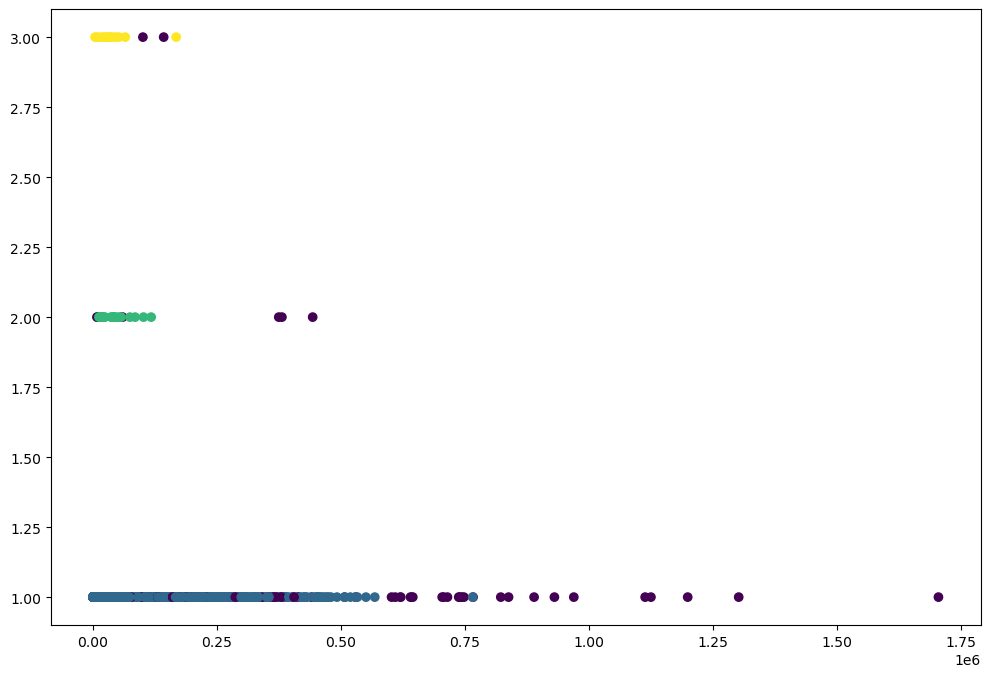

In [39]:
plt.figure(figsize=(12, 8))  
plt.scatter(df['Balance'],df['cc2_miles'], c=dbscan.labels_)
plt.show()

                       Inference

For the above Airlines dataset, we have much no of outliers in it. so it is difficult to choose number of clusters in Hierarchical & Kmeans Clustering but DBSCAN will be effective in this case.  
As we have more number of noise data in dataset so DBSCAN can detect the noise data and throw it away.
Also DBSCAN can find out number of clusters hidden in the dataset with noise.